In [1]:
import veloxchem as vlx
import numpy as np

# load B3LYP optimized geometry in the xyz format
molecule = vlx.Molecule.read_xyz_file("./hs276_optim_b3lyp_dev2-svp.xyz")
molecule.show(atom_indices=True, width=600, height=450)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [2]:
ff_gen = vlx.MMForceFieldGenerator()
ff_gen.create_topology(molecule)
ff_gen.write_gromacs_files('HS-276_initial', 'MOL')

* Info * Using 6-31G* basis set for RESP charges...                                                                       


                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Restart from Checkpoint                                              
                   Convergence Accelerator         : Direct Inversion of Iterative Subspace                               
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

In [3]:
rot_bonds = ff_gen.rotatable_bonds
print(rot_bonds)

[[14, 15], [21, 22], [28, 29], [29, 31], [31, 32]]


## [21, 22]

                                          VeloxChem Dihedral Reparameterization                                           
                                                                                                                          
* Info * Rotatable bond selected: 21-22                                                                                   
* Info * Dihedrals involved:[[16, 21, 22, 23], [16, 21, 22, 27], [19, 21, 22, 23], [19, 21, 22, 27]]                      
* Info * Reading QM scan from file...                                                                                     
* Info *   16-21-22-27.xyz                                                                                                
                                                                                                                          
* Info * Performing dihedral scan for MM baseline by excluding the involved dihedral barriers...                          
                

* Info *      180.0 deg       32.587 kJ/mol                                                                               
* Info *      190.0 deg       32.451 kJ/mol                                                                               
* Info *      200.0 deg       31.969 kJ/mol                                                                               
* Info *      210.0 deg       31.373 kJ/mol                                                                               
* Info *      220.0 deg       30.865 kJ/mol                                                                               
* Info *      230.0 deg       30.540 kJ/mol                                                                               
* Info *      240.0 deg       30.404 kJ/mol                                                                               
* Info *      250.0 deg       30.425 kJ/mol                                                                               
* Info *      26

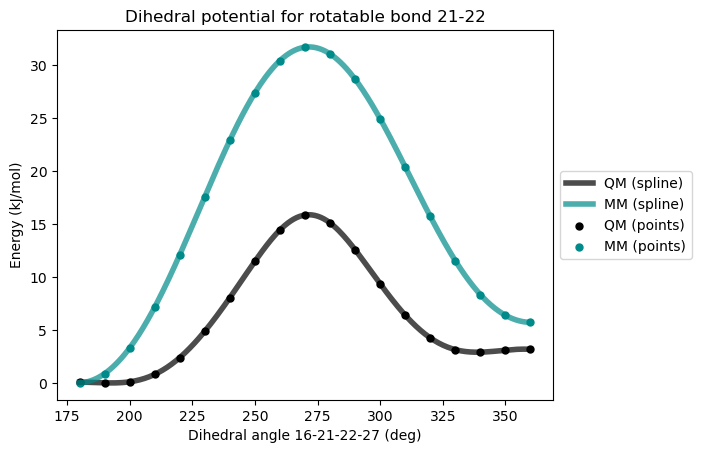

* Info * Fitting the dihedral parameters...                                                                               
* Info * Optimizing dihedral via least squares fitting...                                                                 
* Info * New fitted barriers: [2.22536492 2.22536492 2.22536492 2.22536492]                                               
* Info * Validating the fitted force field...                                                                             
                                                                                                                          
* Info * Summary of validation                                                                                            
* Info * ---------------------                                                                                            
* Info * Maximum difference: 5.002 kJ/mol                                                                                 
* Info * Standar

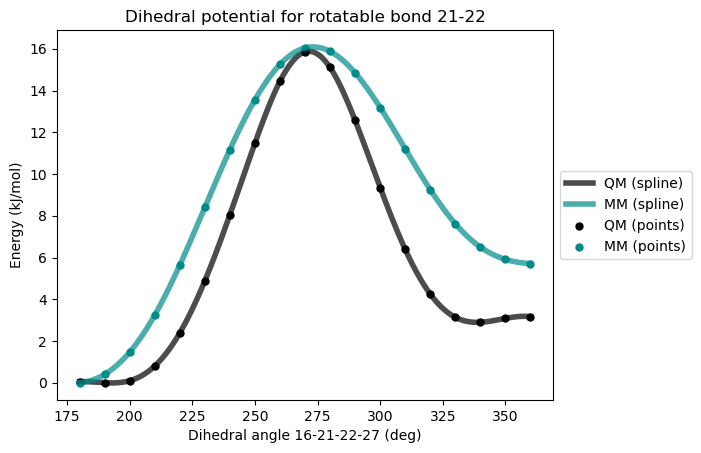

* Info * Dihedral MM parameters have been reparameterized and updated in the topology.                                    


In [4]:
ff_gen.reparameterize_dihedrals(rotatable_bond=(21,22), scan_file="./16-21-22-27.xyz", 
    visualize=True)

In [5]:
ff_gen.add_dihedral((16, 21, 22, 27), barrier=0.0, phase=180.0, periodicity=1)

* Info * Added dihedral 16-21-22-27                                                                                       


                                          VeloxChem Dihedral Reparameterization                                           
                                                                                                                          
* Info * Rotatable bond selected: 21-22                                                                                   
* Info * Dihedrals involved:[[16, 21, 22, 23], [16, 21, 22, 27], [19, 21, 22, 23], [19, 21, 22, 27]]                      
* Info * Reading QM scan from file...                                                                                     
* Info *   16-21-22-27.xyz                                                                                                
                                                                                                                          
* Info * Performing dihedral scan for MM baseline by excluding the involved dihedral barriers...                          
                

* Info *      180.0 deg       32.587 kJ/mol                                                                               
* Info *      190.0 deg       32.451 kJ/mol                                                                               
* Info *      200.0 deg       31.969 kJ/mol                                                                               
* Info *      210.0 deg       31.373 kJ/mol                                                                               
* Info *      220.0 deg       30.865 kJ/mol                                                                               
* Info *      230.0 deg       30.540 kJ/mol                                                                               
* Info *      240.0 deg       30.404 kJ/mol                                                                               
* Info *      250.0 deg       30.425 kJ/mol                                                                               
* Info *      26

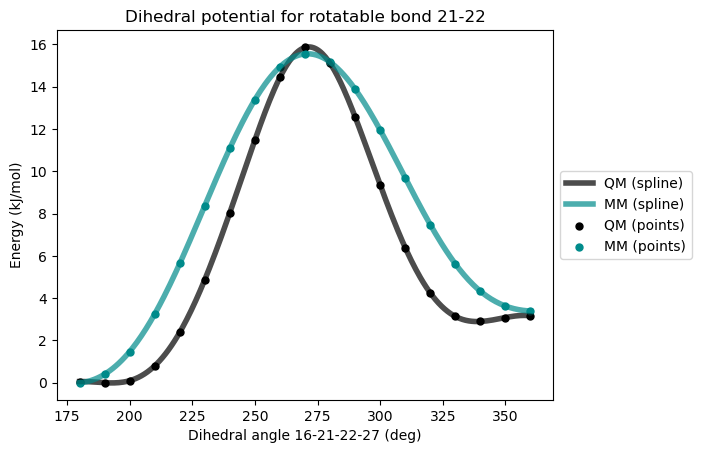

* Info * Dihedral MM parameters have been reparameterized and updated in the topology.                                    


In [6]:
ff_gen.reparameterize_dihedrals(rotatable_bond=(21,22), scan_file="./16-21-22-27.xyz", 
    visualize=True, initial_validation=False)

In [7]:
ff_gen.add_dihedral((16, 21, 22, 27), barrier=0.0, phase=0.0, periodicity=4)

* Info * Added dihedral 16-21-22-27                                                                                       


                                          VeloxChem Dihedral Reparameterization                                           
                                                                                                                          
* Info * Rotatable bond selected: 21-22                                                                                   
* Info * Dihedrals involved:[[16, 21, 22, 23], [16, 21, 22, 27], [19, 21, 22, 23], [19, 21, 22, 27]]                      
* Info * Reading QM scan from file...                                                                                     
* Info *   16-21-22-27.xyz                                                                                                
                                                                                                                          
* Info * Performing dihedral scan for MM baseline by excluding the involved dihedral barriers...                          
                

* Info *      180.0 deg       32.587 kJ/mol                                                                               
* Info *      190.0 deg       32.451 kJ/mol                                                                               
* Info *      200.0 deg       31.969 kJ/mol                                                                               
* Info *      210.0 deg       31.373 kJ/mol                                                                               
* Info *      220.0 deg       30.865 kJ/mol                                                                               
* Info *      230.0 deg       30.540 kJ/mol                                                                               
* Info *      240.0 deg       30.404 kJ/mol                                                                               
* Info *      250.0 deg       30.425 kJ/mol                                                                               
* Info *      26

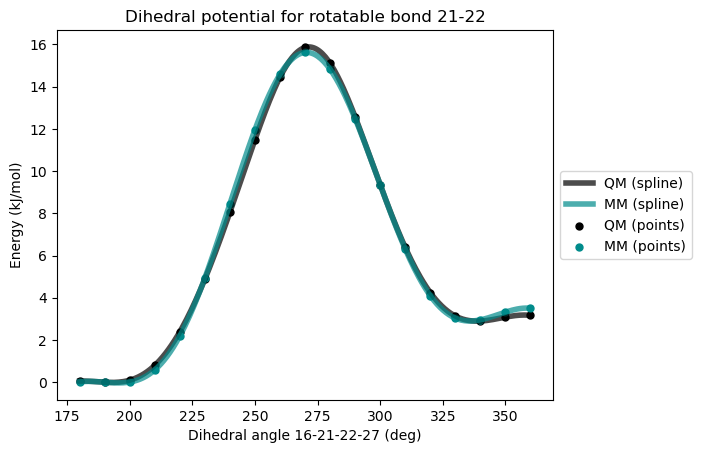

* Info * Dihedral MM parameters have been reparameterized and updated in the topology.                                    


In [8]:
ff_gen.reparameterize_dihedrals(rotatable_bond=(21,22), scan_file="./16-21-22-27.xyz", 
    visualize=True, initial_validation=False)

| Rotatable Bond | Max difference (kJ/mol) | Std deviation (kJ/mol) |
|----------------|-------------------------|------------------------|
| [21, 22]      | 0.477                   | 0.212                  |

In [9]:
ff_gen.write_gromacs_files('HS-276_final', 'MOL')